<a href="https://colab.research.google.com/github/PPKoller/2x2-FNAL/blob/master/Copy_of_eBay_cars_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [157]:
import pandas as pd
import numpy as np
!pip install category_encoders

df = pd.read_csv('/content/gdrive/My Drive/AMAG/Data/eBay_cars/cars_use_case_clean.csv', index_col=0)
df.head(125585)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,notRepairedDamage,postalCode,age,brand,model
3,privat,Angebot,1500,test,kleinwagen,manuell,75,150000,benzin,nein,91074,14.750000,Volkswagen,golf
4,privat,Angebot,3600,test,kleinwagen,manuell,69,90000,diesel,nein,60437,7.750000,Skoda,fabia
5,privat,Angebot,650,test,limousine,manuell,102,150000,benzin,ja,33775,20.500000,BMW,316i
6,privat,Angebot,2200,test,cabrio,manuell,109,150000,benzin,nein,67112,11.666667,Peugeot,206
10,privat,Angebot,2000,control,limousine,manuell,105,150000,benzin,nein,96224,11.333333,Mazda,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218535,privat,Angebot,2499,control,kombi,manuell,107,150000,benzin,nein,16761,14.833333,Skoda,fabia
218536,privat,Angebot,7300,test,bus,manuell,120,150000,diesel,nein,85464,5.750000,Opel,zafira
218537,privat,Angebot,6250,test,cabrio,automatik,170,150000,benzin,nein,45889,14.750000,BMW,320
218540,privat,Angebot,2600,test,kombi,automatik,163,150000,diesel,nein,27211,13.083333,Audi,a6


In [158]:
from sklearn.preprocessing import MinMaxScaler

scale_cat = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df[scale_cat])
#pd.DataFrame(df_scaled)

df[scale_cat] -= df[scale_cat].min()
df[scale_cat] /= df[scale_cat].max()

df


,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,notRepairedDamage,postalCode,age,brand,model
3,privat,Angebot,0.014990,test,kleinwagen,manuell,0.260563,1.000000,benzin,nein,0.909796,0.484932,Volkswagen,golf
4,privat,Angebot,0.035991,test,kleinwagen,manuell,0.239437,0.538462,diesel,nein,0.600115,0.254795,Skoda,fabia
5,privat,Angebot,0.006490,test,limousine,manuell,0.355634,1.000000,benzin,ja,0.330614,0.673973,BMW,316i
6,privat,Angebot,0.021990,test,cabrio,manuell,0.380282,1.000000,benzin,nein,0.667586,0.383562,Peugeot,206
10,privat,Angebot,0.019990,control,limousine,manuell,0.366197,1.000000,benzin,nein,0.961852,0.372603,Mazda,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371513,privat,Angebot,0.043991,control,limousine,manuell,0.366197,1.000000,diesel,nein,0.453134,0.254795,Seat,leon
371516,privat,Angebot,0.014890,control,kleinwagen,manuell,0.172535,1.000000,benzin,nein,0.481002,0.578082,Volkswagen,lupo
371517,privat,Angebot,0.078992,test,limousine,manuell,0.489437,1.000000,diesel,nein,0.749573,0.189041,Volkswagen,golf
371518,privat,Angebot,0.039981,test,kombi,manuell,0.007042,1.000000,diesel,nein,0.816306,0.358904,BMW,320


In [159]:
hot_cat = df.select_dtypes(include=['object']).columns.tolist()


df = df.join(pd.get_dummies(df[hot_cat])).drop(columns=hot_cat)

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
import pandas as pd

#hot_cat = df.select_dtypes(include=['object']).columns.tolist()

#enc = OrdinalEncoder()
#enc.fit(df[hot_cat])
#df = df.drop(columns=hot_cat, axis=1).join(pd.DataFrame(enc.transform(df[hot_cat])))

#encoder_df = pd.DataFrame(enc.transform(df[hot_cat]).toarray())
#df = df.join(encoder_df)
#df.drop(columns=hot_cat, axis=1, inplace=True)

#target_enc = TargetEncoder()
#target_enc.fit(df['model'],y)
#df['model'] = target_enc.transform(df['model'])

In [161]:
df

,price,powerPS,kilometer,postalCode,age,seller_gewerblich,seller_privat,offerType_Angebot,offerType_Gesuch,abtest_control,...,model_xsara,model_y,model_yaris,model_yeti,model_ypsilon,model_yrv,model_z3,model_z4,model_zafira,model_zu
3,0.014990,0.260563,1.000000,0.909796,0.484932,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.035991,0.239437,0.538462,0.600115,0.254795,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.006490,0.355634,1.000000,0.330614,0.673973,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.021990,0.380282,1.000000,0.667586,0.383562,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0.019990,0.366197,1.000000,0.961852,0.372603,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371513,0.043991,0.366197,1.000000,0.453134,0.254795,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
371516,0.014890,0.172535,1.000000,0.481002,0.578082,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
371517,0.078992,0.489437,1.000000,0.749573,0.189041,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
371518,0.039981,0.007042,1.000000,0.816306,0.358904,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
#df = df.head(125000)
y = df['price']
X = df.drop(columns=['price'], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [163]:
from sklearn.ensemble import RandomForestRegressor

#model=RandomForestRegressor()

from sklearn import linear_model

max_iter = np.ceil(10**6 / 216147)

model = linear_model.SGDRegressor(max_iter = max_iter, penalty = "l2", loss = 'squared_error', average=False)
model.fit(np.array(X_train),np.array(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDRegressor(max_iter=5.0)

In [164]:
predictions=model.predict(np.array(X_test))

In [165]:
X_val = X_test.copy()
X_val['price'] = y_test
X_val['pred'] = np.array(predictions)
X_val

,powerPS,kilometer,postalCode,age,seller_gewerblich,seller_privat,offerType_Angebot,offerType_Gesuch,abtest_control,abtest_test,...,model_yaris,model_yeti,model_ypsilon,model_yrv,model_z3,model_z4,model_zafira,model_zu,price,pred
245742,0.524648,1.000000,0.655649,0.298630,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.104992,0.074801
363148,0.457746,1.000000,0.652505,0.457534,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.032981,0.028827
141377,0.500000,1.000000,0.719037,0.523288,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.035491,0.053922
118935,0.373239,0.461538,0.469681,0.465753,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0.027991,0.055130
112881,0.500000,0.461538,0.502087,0.147945,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.184994,0.149478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51566,0.387324,0.230769,0.890499,0.120548,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.167983,0.149465
81533,0.278169,1.000000,0.406030,0.506849,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0.014490,0.002168
147827,0.457746,1.000000,0.114140,0.295890,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.073991,0.078283
138237,0.295775,1.000000,0.673095,0.621918,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0.003990,-0.034644


In [166]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

mse=mean_squared_error(np.array(y_test),np.array(predictions))

mae=mean_absolute_error(y_test,predictions)

mape=mean_absolute_percentage_error(y_test,predictions)

#msle=mean_squared_log_error(y_test,predictions)

print(mse)

print(mae)

print(mape)

#print(msle)

0.0010670330312524449
0.021539414613723183
168998133949.7513


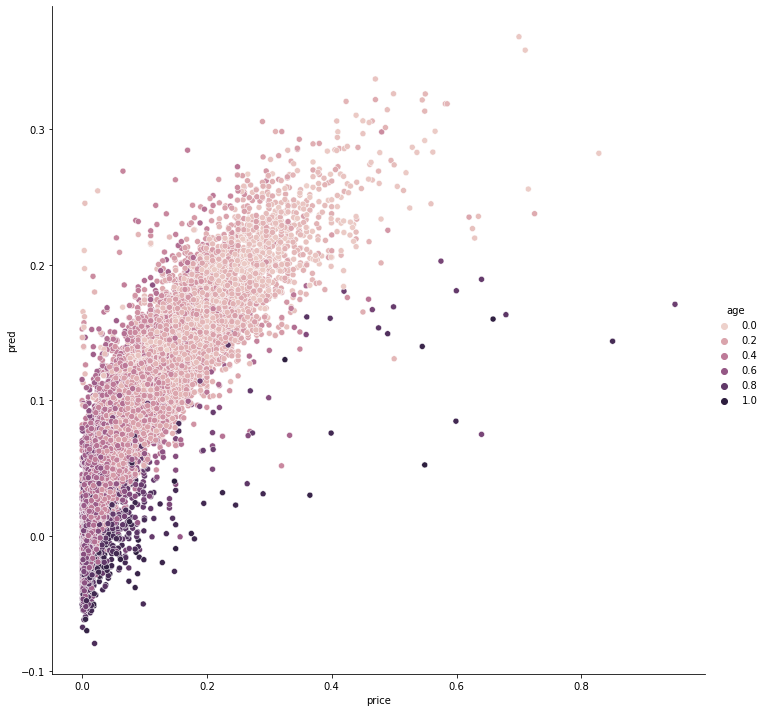

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(data=X_val, x='price', y='pred', hue='age', height=10, aspect=1)
